# Teleportation - Qiskit


In [111]:
# Import the Qiskit SDK
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer

from qiskit.tools.visualization import matplotlib_circuit_drawer as drawer, qx_color_scheme

# general imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
def teleport(angle,num_shots=1024):
    '''
        Simulates teleportation of a state cos(angle/2)|0> + sin(angle/2)|1> with num_shots repetitions.
        The statistics of the measurement on the teleported qubit are returned.
    '''
    # 3-qubit circuit
    # q0 : qubit to be teleported
    # q1,q2 : entangled pair used for teleportation
    # after the protocol, q2 will contain the teleported state form q0
    q = QuantumRegister(3)
    
    # 3 classical registers for measurements on the 3 qubits
    c = ClassicalRegister(3)
    
    qc = QuantumCircuit(q, c)

    # create the state of the intial qubit to be teleported using a rotation about Y-axis
    qc.ry(angle,q[0])

    # create a Bell state between qubits q1 and q2
    qc.h(q[1])
    qc.cx(q[1], q[2])

    # measure q0 and q1 in the Bell basis
    qc.cx(q[0], q[1])
    qc.h(q[0])

    # correction to the teleported state
    qc.cx(q[1], q[2])
    qc.cz(q[0], q[2])

    qc.measure(q, c)

    # Choose a simulator. I used the default qasm simulator. 
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim,shots=num_shots)
    result_sim = job_sim.result()

    res = result_sim.get_counts(qc)

    # prob_0 and prob_1 are measurements on the third qubit
    prob_0,prob_1 = 0,0
    for key in res.keys():
        # key[0]=="0" means q2 qubit is 0
        # this is non-intuitive notation
        if key[0] == "0":
            prob_0 += res[key]
        else:
            prob_1 += res[key]

    prob_0 /= num_shots
    prob_1 /= num_shots

    return [prob_0,prob_1]

# Test on a single angle

In [123]:
# test 
angle = np.pi/4
exp_prob_0 = (np.cos(angle/2))**2
exp_prob_1 = (np.sin(angle/2))**2
print("Measured prob.",teleport(angle))
print("Expected prob.",[exp_prob_0,exp_prob_1])

Measured prob. [0.8740234375, 0.1259765625]
Expected prob. [0.8535533905932737, 0.14644660940672624]


# Circuit Diagram
- Note that the drawer does not have proper notation for C-Z gate. 

- The measurments ideally should be at the end, but they are drawn in between. This does not affect the physics, but it looks unconventional.

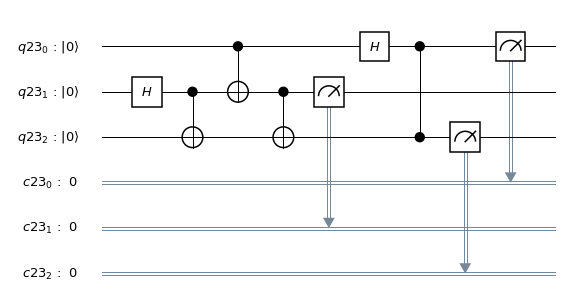

In [127]:
drawer(qc)

# Teleportation Experiment
I will simulate a range of initial states $\cos(\theta/2)|0\rangle + \sin(\theta/2)|1\rangle$ and report the simulator observed probabilities in the computational basis on the qubit with the teleported state. It will be compared to the theoretical prediction from the initial state.

A agreement between the measurement probabilities and the probabilities from the initial state imply that the state was successfully teleported.

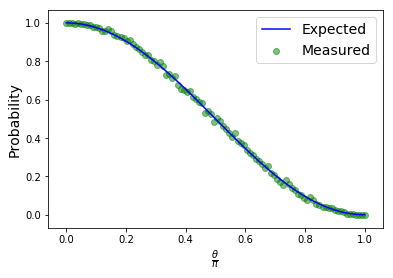

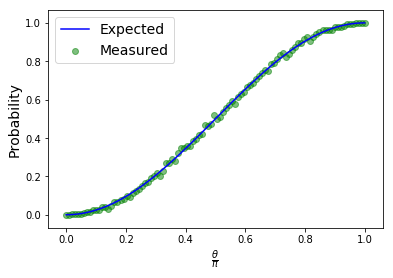

In [121]:
# test over a range of angles
angle_vec = np.linspace(0,np.pi,100)
exp_prob_0 = np.cos(angle_vec/2)**2
exp_prob_1 = np.sin(angle_vec/2)**2
prob_0_vec = [] 
prob_1_vec = [] 
for angle in angle_vec:
    prob = teleport(angle)
    prob_0_vec.append(prob[0])
    prob_1_vec.append(prob[1])

plt.figure(1)
plt.plot(angle_vec/np.pi,exp_prob_0,label="Expected",color="b")
plt.scatter(angle_vec/np.pi,prob_0_vec,label="Measured",color="g",alpha=0.5)
plt.xlabel(r"$\frac{\theta}{\pi}$",fontsize=14)
plt.ylabel(r"Probability",fontsize=14)
plt.legend(fontsize=14)

plt.figure(2)
plt.plot(angle_vec/np.pi,exp_prob_1,label="Expected",color="b")
plt.scatter(angle_vec/np.pi,prob_1_vec,label="Measured",color="g",alpha=0.5)
plt.xlabel(r"$\frac{\theta}{\pi}$",fontsize=14)
plt.ylabel(r"Probability",fontsize=14)
plt.legend(fontsize=14)